This notebook is designed to test the inference API. I will load continious waveform from our dataset, and make a post call to see if the API is working.

In [1]:
import h5py
import httpx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f=h5py.File("../dataset/waveform.h5","r")

In [3]:
net,sta="11_52111","A01"
data=f[net][sta]
for key,val in data.attrs.items():
    print(key,val)

azimuth 261.40685527899217
back_azimuth 81.63077771907837
begin_time 2009-12-02T01:10:41.317870
component ['1' '2' 'Z']
distance_km 64.03723091735361
dt_s 0.025
elevation_m -1059.0
end_time 2009-12-02T01:20:41.317870
event_id 11_52111
latitude -21.533899
local_depth_m 0.0
location 
longitude -175.623505
network YL
phase_index [ 9600 10001]
phase_polarity ['N' 'N']
phase_score [1 1]
phase_time ['2009-12-02T01:14:41.317870' '2009-12-02T01:14:51.343700']
phase_type ['P' 'S']
snr [5.20634372 8.18201576 9.42164388]
station A01
takeoff_angle 124.5301244813764
unit m/s


In [4]:
id=[f"{net}.{sta}"]
timestamp=[f"{data.attrs['begin_time']}"]
vec=[data[...].tolist()]
extract_phases=["P","S"]
extract_phase_sensitivity=[0.5,0.5]

headers = {
    'Content-Type': 'application/json'
}

request_body={
    "id":id,
    "timestamp":timestamp,
    "vec":vec,
    "extract_phases":extract_phases,
    "extract_phase_sensitivity":extract_phase_sensitivity
}

In [5]:
url = "http://127.0.0.1:8080/predict"
response = httpx.post(url, headers=headers, json=request_body)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    print("Request was successful!")
    print("Response:", response.json())
else:
    print("Request failed with status code:", response.status_code)

Request was successful!
Response: {'id': ['11_52111.A01'], 'possibility': [{'noise': [0.9998688697814941, 0.9999246597290039, 0.9999527931213379, 0.9999701976776123, 0.9999810457229614, 0.9999814033508301, 0.9999814033508301, 0.9999815225601196, 0.9999816417694092, 0.9999821186065674, 0.9999825954437256, 0.9999830722808838, 0.9999834299087524, 0.9999825954437256, 0.9999815225601196, 0.9999804496765137, 0.9999792575836182, 0.9999762773513794, 0.9999727010726929, 0.9999685287475586, 0.9999639987945557, 0.9999533891677856, 0.9999395608901978, 0.9999216794967651, 0.9998985528945923, 0.9998703002929688, 0.999834418296814, 0.9997887015342712, 0.9997300505638123, 0.9996719360351562, 0.999601423740387, 0.999515175819397, 0.9994097948074341, 0.9993288516998291, 0.9992375373840332, 0.9991357922554016, 0.9990202188491821, 0.9989022016525269, 0.998770534992218, 0.9986205101013184, 0.9984502792358398, 0.9982909560203552, 0.998115062713623, 0.9979196190834045, 0.997703492641449, 0.9976158142089844, 

['11_52111.A01']
[{'noise': [0.9998688697814941, 0.9999246597290039, 0.9999527931213379, 0.9999701976776123, 0.9999810457229614, 0.9999814033508301, 0.9999814033508301, 0.9999815225601196, 0.9999816417694092, 0.9999821186065674, 0.9999825954437256, 0.9999830722808838, 0.9999834299087524, 0.9999825954437256, 0.9999815225601196, 0.9999804496765137, 0.9999792575836182, 0.9999762773513794, 0.9999727010726929, 0.9999685287475586, 0.9999639987945557, 0.9999533891677856, 0.9999395608901978, 0.9999216794967651, 0.9998985528945923, 0.9998703002929688, 0.999834418296814, 0.9997887015342712, 0.9997300505638123, 0.9996719360351562, 0.999601423740387, 0.999515175819397, 0.9994097948074341, 0.9993288516998291, 0.9992375373840332, 0.9991357922554016, 0.9990202188491821, 0.9989022016525269, 0.998770534992218, 0.9986205101013184, 0.9984502792358398, 0.9982909560203552, 0.998115062713623, 0.9979196190834045, 0.997703492641449, 0.9976158142089844, 0.9975394010543823, 0.9974642992019653, 0.997382223606109

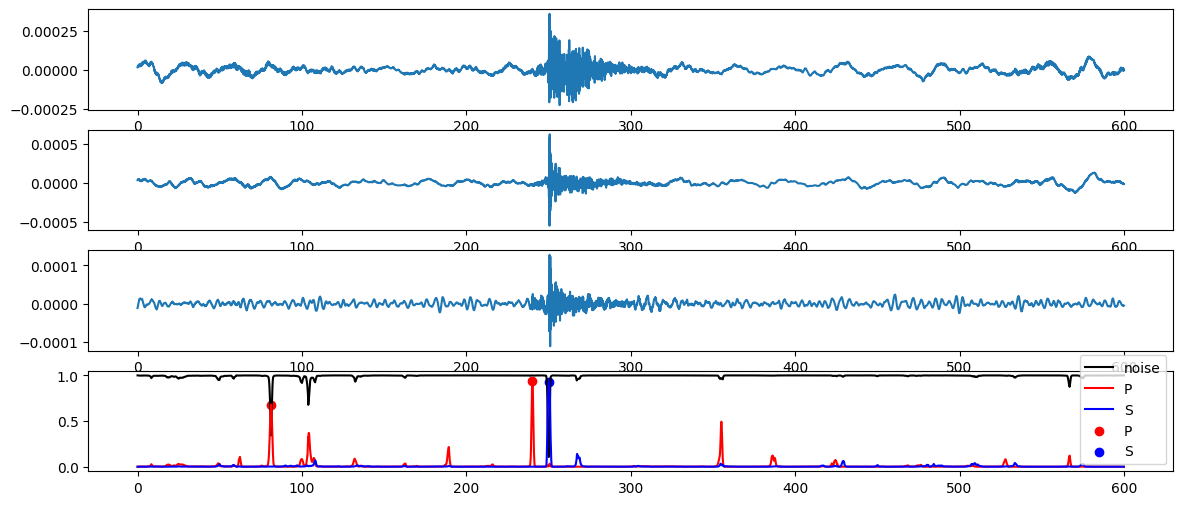

In [6]:
def show_response(request,response):
    res=response.json()
    print(res["id"])
    print(res["possibility"])
    print(res["arrivals"])
    print(res["amps"])
    print(res["arrival_times"])

    # plot
    fig,ax=plt.subplots(4,1,figsize=(14,6))
    # plot waveform
    dt_s=0.025
    x=np.arange(0,len(request["vec"][0][0]))*dt_s
    ax[0].plot(x,request["vec"][0][0])
    ax[1].plot(x,request["vec"][0][1])
    ax[2].plot(x,request["vec"][0][2])
    colors={
        "noise":"black",
        "P":"red",
        "S":"blue",
    }
    # plot possibility
    for phase in res["possibility"][0].keys():
        ax[3].plot(x,res["possibility"][0][phase],label=phase,color=colors[phase])
    ax[3].legend()
    # plot arrival
    for phase in res["arrivals"][0].keys():
        ax[3].scatter(np.array(res["arrivals"][0][phase])*dt_s,res["amps"][0][phase],label=phase,color=colors[phase])
    ax[3].legend()
    plt.show()


show_response(request_body,response)